<a href="https://colab.research.google.com/github/AmoghShukla/Gold_Price_Predictor_Using_RF/blob/main/GoldPricePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
# Loading the CSV Data in Pandas DataFrame
gold_data = pd.read_csv("/content/gld_price_data.csv")

In [3]:
# Print the first 5 rows from the DataFrame
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# Print the last 5 rows of the DataFrame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# No. of Rows and Columns
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# Checking the no. of Missing Values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [8]:
# Getting the Statistical Message of Data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
  1) Positive Correlation
  2) Negative Correlation

In [9]:
correlation = gold_data.corr(numeric_only = True)

<Axes: >

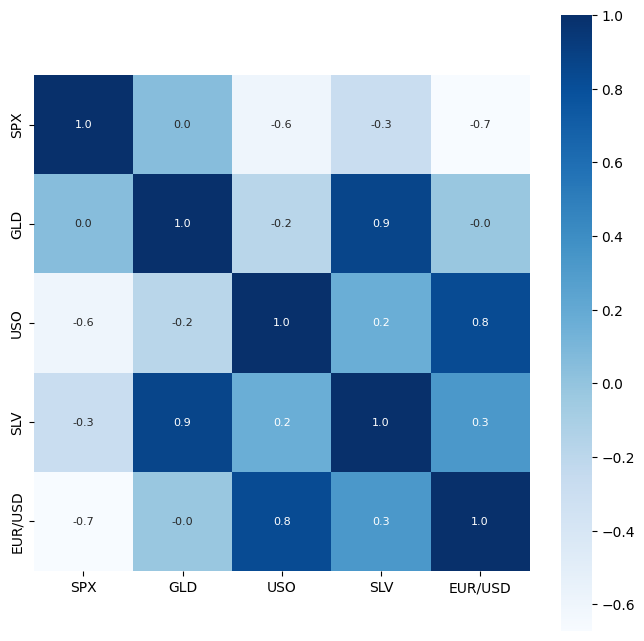

In [ ]:
# Constructing a Heatmap to Understand the Correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [10]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-1691512665.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='Red')


<Axes: xlabel='GLD', ylabel='Density'>

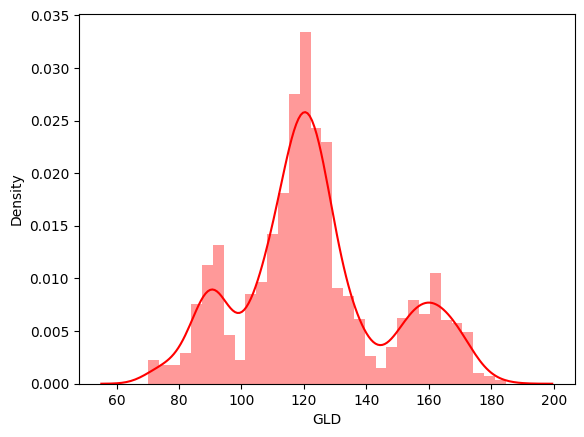

In [11]:
# Checking the Distribution of GLD Price
sns.distplot(gold_data['GLD'], color='Red')

Splitting the Features and Target(Gold Price)

In [14]:
X = gold_data.drop(['Date', 'GLD'], axis=1) # For Dropping a Column axis = 1, and For Dropping a Row, axis = 0
Y = gold_data['GLD']

In [15]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Now we have to split the features on target into **Testing Data & Training Data**
1) Train our ML Algorithmn with Training Data
2) Evaluate our Regresser using Testing Data **bold text**

X will be separated into X_train(80% of Values) and X-test(20% of Values)
Y will be separated into Y_train and Y_test

Y_train contains the corresponding gold prices for all the values in X_train, SImilarly, Y_test contains all the corresponding gold values for X_test


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

**Model Training : Random Forest Regressor**

Random Forest is an Ensemble model means it contains more than one models joined together. It Contains Multiple Decision Trees, ANd then all the results of those Decision Trees are Averaged out or Mojority Voted to Find the Output.

---



In [32]:
regressor = RandomForestRegressor(n_estimators=100)

In [33]:
# Train the Model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

**Model Evaluation**

In [34]:
# Prediction on test Data

test_data_prediction = regressor.predict(X_test)

In [35]:
print(test_data_prediction)

[168.29229908  81.76300002 116.00020033 127.57250088 120.59580115
 154.69339827 150.35949824 126.11770025 117.48669859 125.94640027
 116.86630104 171.91650084 141.7637993  168.08199803 114.97770017
 117.55750053 138.9766034  170.26450107 159.95020301 157.55319904
 155.17890023 125.28710053 176.13689919 157.35020327 125.17440028
  93.95069925  77.94129979 120.58470001 119.03829925 167.38229965
  88.22250051 125.10140045  90.94920102 117.70779998 121.18019927
 136.13840078 115.5798012  115.4190009  148.44360016 107.27750117
 104.15630256  87.24119801 126.51960027 117.97269996 154.57479919
 119.74649987 108.29739995 108.04499817  92.9468005  127.19459745
  75.32210011 113.67879936 121.61380003 111.28739936 118.94729897
 120.32139972 159.26239998 166.86550127 146.75479592  85.87279865
  94.39320047  86.7822989   90.47990035 118.88860083 126.38830076
 127.58350023 169.73560006 122.34159957 117.43369884  98.73790024
 168.12410088 142.99439901 131.55160233 121.15240219 120.50389945
 119.73430

In [36]:
# R Squared Error

Error_Square = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Error : ",Error_Square)

R Squared Error :  0.9893268405698474


Predicting what is the right error for our model is not possible but in a dataset where the predicted values are in 100s an error of 0.98 is fine to work with

**----------------------------------------------------------------**

Compare the Acutal Values and Predicted values:

First Convert Y_test in List else it will give error

In [37]:
Y_test = list(Y_test)

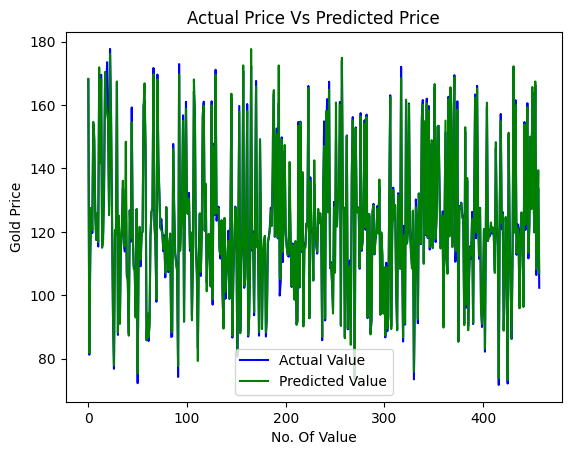

In [40]:
plt.plot(Y_test, color='blue', label="Actual Value")
plt.plot(test_data_prediction, color='green', label="Predicted Value")
plt.title("Actual Price Vs Predicted Price")
plt.xlabel("No. Of Value")
plt.ylabel("Gold Price")
plt.legend()
plt.show()